In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("emailspam.csv")

In [4]:
df.head(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA
3. Text preprocessing
4. Model Building
5. Evaluation
6. Website
7. Deploy

# Data Cleaning

In [10]:
#Drop last three columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [11]:
df.sample(5)

,v1,v2
3162,spam,This is the 2nd time we have tried to contact ...
2596,ham,No i'm not gonna be able to. || too late notic...
4958,ham,"What i mean was i left too early to check, cos..."
5149,ham,Pls call me da. What happen.
1531,ham,Oh dang! I didn't mean o send that to you! Lol!


In [12]:
#Rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [13]:
df.sample(3)

,target,text
1002,ham,Yes..he is really great..bhaji told kallis bes...
5132,ham,it's still not working. And this time i also t...
2926,ham,Ok... U enjoy ur shows...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])


In [16]:
#check null values and duplicate
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

414

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5158, 2)

# 2. EDA(exploratory data analysis)

In [22]:
#counts
df['target'].value_counts()

target
0    4516
1     642
Name: count, dtype: int64

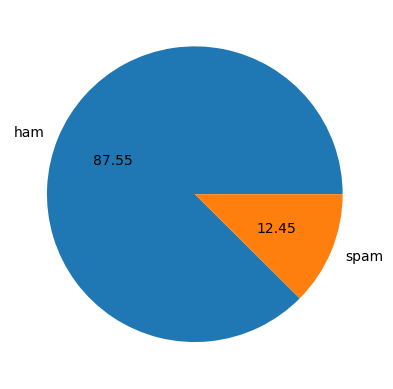

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
import nltk #natural language tool-kit

In [25]:
nltk.download('punkt') #to install dependency to run nltk

[nltk_data] Downloading package punkt to /Users/nihal-ud-
[nltk_data]     din./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len) 

In [27]:
df.sample()

,target,text,num_characters
5007,0,Go fool dont cheat others ok,28


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentence']].describe() #just to check what's happening

,num_characters,num_words,num_sentence
count,5158.000000,5158.000000,5158.000000
mean,78.806708,18.430399,1.962195
std,58.187284,13.326907,1.445515
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.123782,1.820195
std,56.352902,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,642.00000,642.000000,642.000000
mean,137.59190,27.621495,2.961059
std,30.29638,7.048863,1.477880
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,9.000000


In [34]:
import seaborn as sns

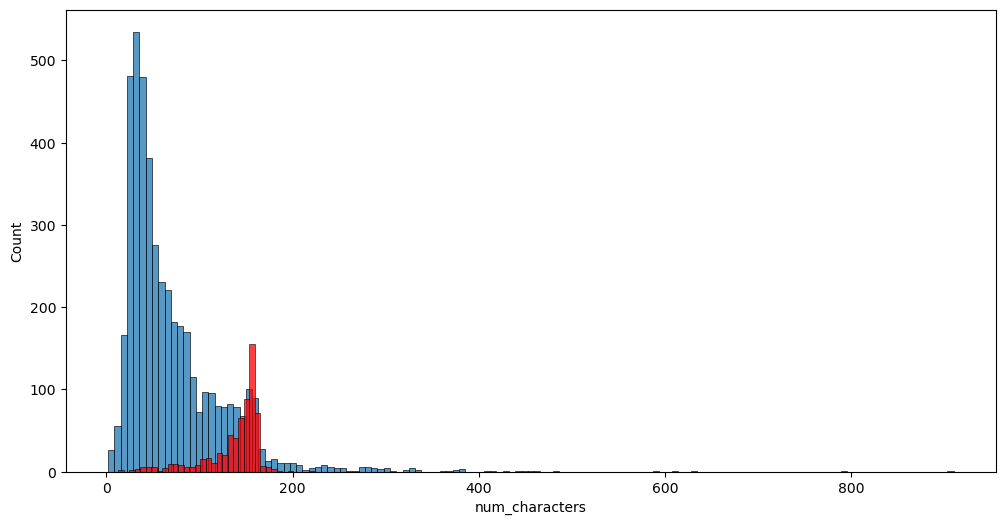

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

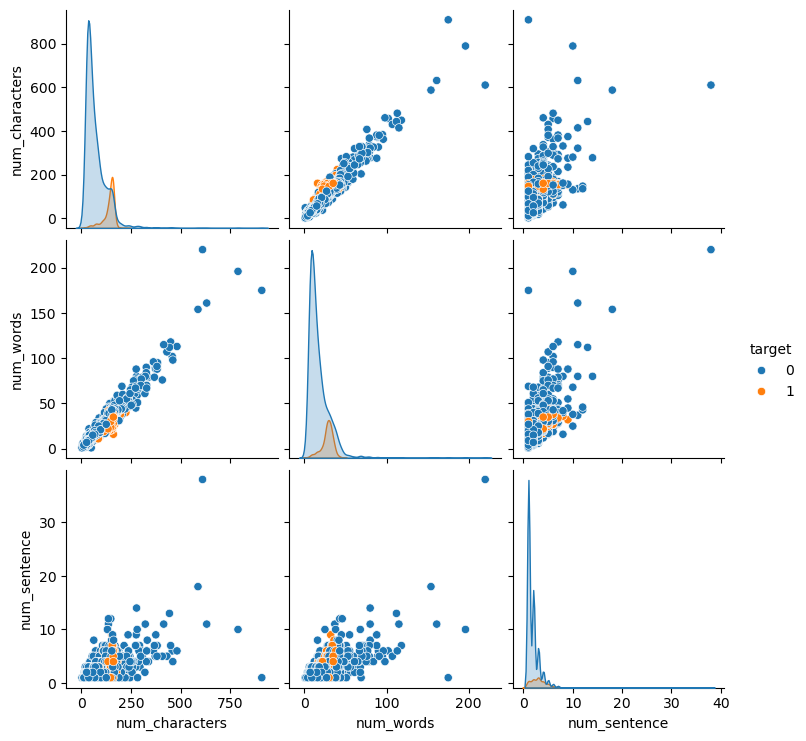

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

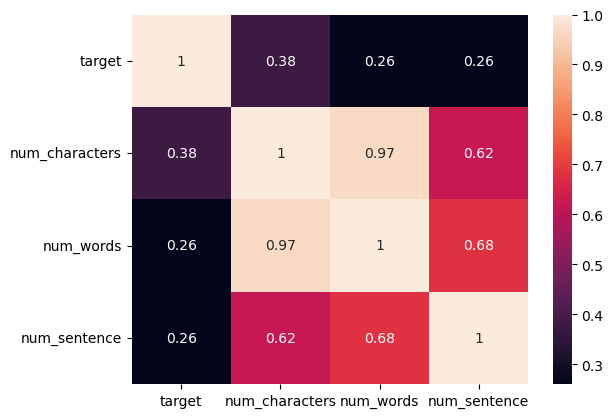

In [37]:
#df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True)

# 3. Data preprocessing
Lower case <br>
Tokenization <br>
Removing special characters <br>
Removing stop words and punctuation <br>
Stemming

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = [] #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] #removing stopwords and punctuation
    y.clear()
    
    for i in text:
                if i not in stopwords.words('english') and i not in string.punctuation:
                    y.append(i)

    text = y[:] #for stemming
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/nihal-ud-
[nltk_data]     din./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
transform_text('Hi how are you wie gehts, dich # *(&')

'hi wie geht dich'

In [45]:
#for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [51]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

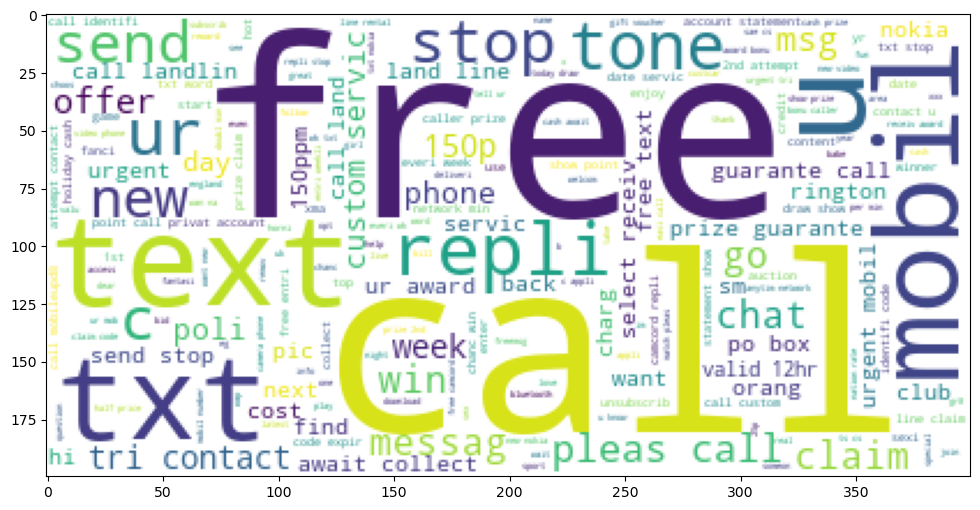

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [63]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

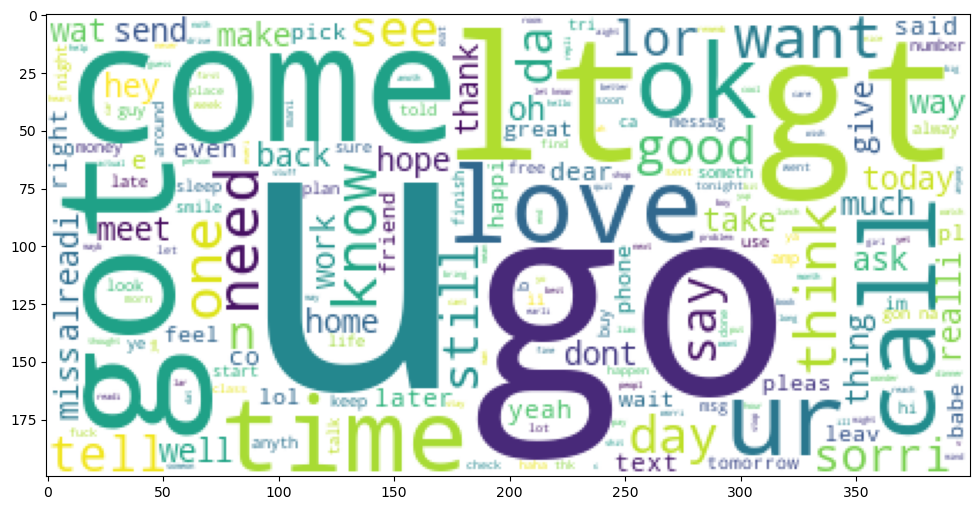

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [67]:
#filter top 30 words use in spam
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len(spam_corpus)

9765

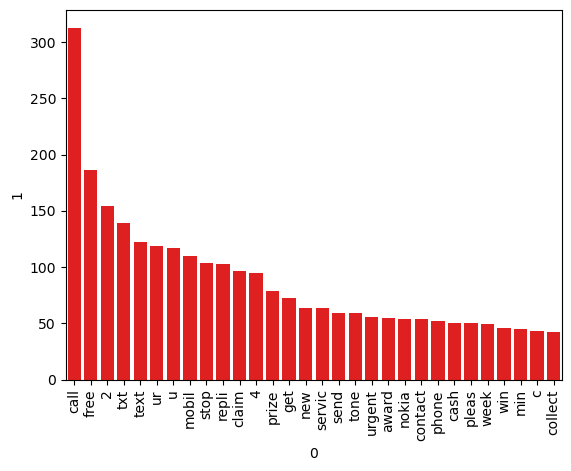

In [71]:
from collections import Counter
spam_word = pd.DataFrame(Counter(spam_corpus).most_common(30))
# print(spam_word)
sns.barplot(spam_word,x=spam_word[0],y=spam_word[1],color="red")
plt.xticks(rotation='vertical')
plt.show()

In [73]:
#filter top 30 words use in ham
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

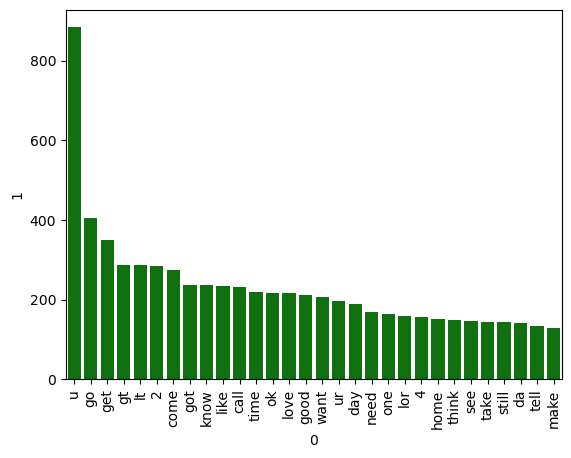

In [79]:
ham_word = pd.DataFrame(Counter(ham_corpus).most_common(30))
# print(spam_word)
sns.barplot(ham_word,x=ham_word[0],y=ham_word[1],color="green")
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [209]:
#using BagOfWords vectorize data then send to naivebase
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [211]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5158, 3000)

In [213]:
y = df['target'].values

In [215]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [217]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [221]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [223]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [225]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.872093023255814
[[789 114]
 [ 18 111]]
0.49333333333333335


In [227]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[902   1]
 [ 24 105]]
0.9905660377358491


In [229]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806201550387597
[[901   2]
 [ 18 111]]
0.9823008849557522


In [231]:
#tfidf and mnb choosen

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [235]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [237]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [239]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [241]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9563953488372093, 0.9565217391304348)

In [243]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)


    print("For ", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9815891472868217
Precision -  1.0
For  KN
Accuracy -  0.9137596899224806
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9757751937984496
Precision -  0.9905660377358491
For  DT
Accuracy -  0.9418604651162791
Precision -  0.8631578947368421
For  LR
Accuracy -  0.9563953488372093
Precision -  0.9565217391304348
For  RF
Accuracy -  0.9699612403100775
Precision -  1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.9439252336448598
For  BgC
Accuracy -  0.9622093023255814
Precision -  0.8947368421052632
For  ETC
Accuracy -  0.9796511627906976
Precision -  1.0
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.9555555555555556
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9532710280373832


In [253]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [255]:
performance_df,temp_df

(   Algorithm  Accuracy  Precision
 0        SVC  0.981589   1.000000
 5         RF  0.969961   1.000000
 8        ETC  0.979651   1.000000
 2         NB  0.975775   0.990566
 1         KN  0.913760   0.976190
 4         LR  0.956395   0.956522
 9       GBDT  0.954457   0.955556
 10       xgb  0.968992   0.953271
 6   AdaBoost  0.967054   0.943925
 7        BgC  0.962209   0.894737
 3         DT  0.941860   0.863158,
    Algorithm  Accuracy_max_ft_3000  Precision_max_ft_3000
 0        SVC              0.981589               1.000000
 5         RF              0.969961               1.000000
 8        ETC              0.979651               1.000000
 2         NB              0.975775               0.990566
 1         KN              0.913760               0.976190
 4         LR              0.956395               0.956522
 9       GBDT              0.954457               0.955556
 10       xgb              0.968992               0.953271
 6   AdaBoost              0.967054             

In [203]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [205]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906977
1,NB,Accuracy,0.964147
2,RF,Accuracy,0.969961
3,ETC,Accuracy,0.971899
4,SVC,Accuracy,0.973837
5,GBDT,Accuracy,0.957364
6,xgb,Accuracy,0.968992
7,LR,Accuracy,0.953488
8,AdaBoost,Accuracy,0.961240
9,BgC,Accuracy,0.961240


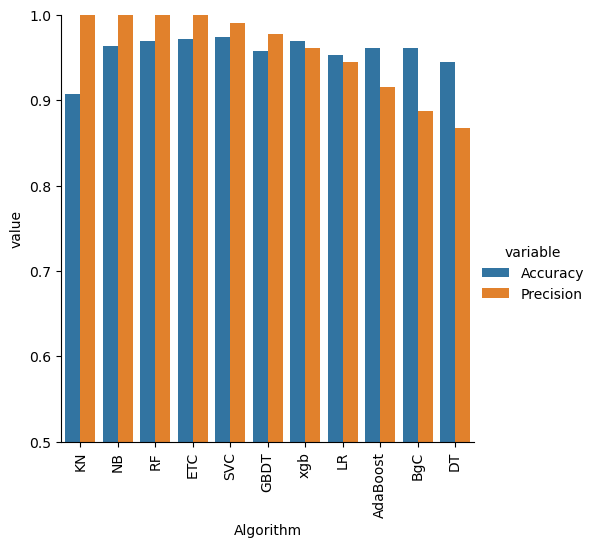

In [207]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [257]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.981589,1.000000,0.981589,1.000000
1,RF,0.969961,1.000000,0.969961,1.000000
2,ETC,0.979651,1.000000,0.979651,1.000000
3,NB,0.975775,0.990566,0.975775,0.990566
4,KN,0.913760,0.976190,0.913760,0.976190
5,LR,0.956395,0.956522,0.956395,0.956522
6,GBDT,0.954457,0.955556,0.954457,0.955556
7,xgb,0.968992,0.953271,0.968992,0.953271
8,AdaBoost,0.967054,0.943925,0.967054,0.943925
9,BgC,0.962209,0.894737,0.962209,0.894737


In [259]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))